# Importing libraries

In [1]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import datetime
pd.set_option('display.max_columns',None)
pd.set_option('display.max_colwidth',None)

In [2]:
space_url = 'https://api.spacexdata.com/v4/launches/past'

In [3]:
response = requests.get(space_url)

In [4]:
#print(response.content)

In [4]:
response.status_code

200

In [5]:
data = pd.json_normalize(response.json())

In [6]:
data.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'merlin engine failure'}]",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-falcon-1-rocket-lost-launch.html,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'harmonic oscillation leading to premature engine shutdown'}]","Successful first stage burn and transition to second stage, maximum altitude 289 km, Premature engine shutdown at T+7 min 30 s, Failed to reach orbit, Failed to recover first stage",[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/f9/4a/ZboXReNb_o.png,https://images2.imgbox.com/80/a2/bkWotCIS_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-rocket-fails-reach-orbit.html,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'residual stage-1 thrust led to collision between stage 1 and stage 2'}]",Residual stage 1 thrust led to collision between stage 1 and stage 2,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006eeb1e4]",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}]",True,False,None,5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/6c/cb/na1tzhHs_o.png,https://images2.imgbox.com/4a/80/k1oAkY0k_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1-flight-3-mission-summary,https://en.wikipedia.org/wiki/Trailblazer_(satellite),NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],"Ratsat was carried to orbit on the first successful orbital launch of any privately funded and developed, liquid-propelled carrier rocket, the SpaceX Falcon 1",[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': 

In [7]:
data = data[['rocket','payloads','launchpad','cores','flight_number','date_utc']]
#remove rows with muliple cores
data = data[data['cores'].map(len)==1]
#remove rows with multiple payloads
data = data[data['payloads'].map(len)==1]
#extract valuable data from cores and payloads columns
data['cores'] = data['cores'].map(lambda x:x[0])
data['payloads'] = data['payloads'].map(lambda x: x[0])
#convert date_utc to datetime data type
data['date'] = pd.to_datetime(data['date_utc']).dt.date
#restrict the dates of launches
data = data[data['date']<=datetime.date(2020,11,13)]

In [8]:
data.head()

,rocket,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,"{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,"{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",2,2007-03-21T01:10:00.000Z,2007-03-21
3,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e5,5e9e4502f5090995de566f86,"{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",4,2008-09-28T23:15:00.000Z,2008-09-28
4,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e6,5e9e4502f5090995de566f86,"{'core': '5e9e289ef359184f103b2627', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",5,2009-07-13T03:35:00.000Z,2009-07-13
5,5e9d0d95eda69973a809d1ec,5eb0e4b7b6c3bb0006eeb1e7,5e9e4501f509094ba4566f84,"{'core': '5e9e289ef359185f2b3b2628', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",6,2010-06-04T18:45:00.000Z,2010-06-04


In [9]:
BoosterVersion = [] #from rocket
PayloadMass = [] # from payloads
Orbit = [] #from payloads
LaunchSite =[] #from launchpad
Longitude=[] #from launchpad
Latitude=[] #from launchpad
Outcome = [] #from cores
Flights = [] #from cores
Gridfins=[] #from cores
Reused=[] #from cores
Legs=[] #from cores
LandingPad=[] # from cores
Block =[] #from cores
ReusedCounts = [] #from cores
Serial = [] #from cores

In [11]:
#define a function to get booster version
def GetBoosterVersion(data):
    for x in data['rocket']:
        if x:
            response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
            BoosterVersion.append(response['name'])

In [11]:
data

,rocket,payloads,launchpad,cores,flight_number,date_utc,date
0,5e9d0d95eda69955f709d1eb,5eb0e4b5b6c3bb0006eeb1e1,5e9e4502f5090995de566f86,"{'core': '5e9e289df35918033d3b2623', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",1,2006-03-24T22:30:00.000Z,2006-03-24
1,5e9d0d95eda69955f709d1eb,5eb0e4b6b6c3bb0006eeb1e2,5e9e4502f5090995de566f86,"{'core': '5e9e289ef35918416a3b2624', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",2,2007-03-21T01:10:00.000Z,2007-03-21
3,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e5,5e9e4502f5090995de566f86,"{'core': '5e9e289ef3591855dc3b2626', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",4,2008-09-28T23:15:00.000Z,2008-09-28
4,5e9d0d95eda69955f709d1eb,5eb0e4b7b6c3bb0006eeb1e6,5e9e4502f5090995de566f86,"{'core': '5e9e289ef359184f103b2627', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",5,2009-07-13T03:35:00.000Z,2009-07-13
5,5e9d0d95eda69973a809d1ec,5eb0e4b7b6c3bb0006eeb1e7,5e9e4501f509094ba4566f84,"{'core': '5e9e289ef359185f2b3b2628', 'flight': 1, 'gridfins': False, 'legs': False, 'reused': False, 'landing_attempt': False, 'landing_success': None, 'landing_type': None, 'landpad': None}",6,2010-06-04T18:45:00.000Z,2010-06-04
...,...,...,...,...,...,...,...
101,5e9d0d95eda69973a809d1ec,5ef6a4600059c33cee4a829e,5e9e4502f509094188566f88,"{'core': '5ef670f10059c33cee4a826c', 'flight': 2, 'gridfins': True, 'legs': True, 'reused': True, 'landing_attempt': True, 'landing_success': True, 'landing_type': 'ASDS', 'landpad': '5e9e3032383ecb6bb234e7ca'}",102,2020-09-03T12:46:00.000Z,2020-09-03
102,5e9d0d95eda69973a809d1ec,5ef6a48e0059c33cee4a829f,5e9e4502f509094188566f88,"{'core': '5e9e28a7f3591817f23b2663', 'flight': 3, 'gridfins': True, 'legs': True, 'reused': True, 'landing_attempt': True, 'landing_success': True, 'landing_type': 'ASDS', 'landpad': '5e9e3032383ecb6bb234e7ca'}",103,2020-10-06T11:29:00.000Z,2020-10-06
103,5e9d0d95eda69973a809d1ec,5ef6a4d50059c33cee4a82a1,5e9e4502f509094188566f88,"{'core': '5e9e28a6f35918c0803b265c', 'flight': 6, 'gridfins': True, 'legs': True, 'reused': True, 'landing_attempt': True, 'landing_success': True, 'landing_type': 'ASDS', 'landpad': '5e9e3032383ecb6bb234e7ca'}",104,2020-10-18T12:25:00.000Z,2020-10-18
104,5e9d0d95eda69973a809d1ec,5ef6a4ea0059c33cee4a82a2,5e9e4501f509094ba4566f84,"{'core': '5ef670f10059c33cee4a826c', 'flight': 3, 'gridfins': True, 'legs': True, 'reused': True, 'landing_attempt': True, 'landing_success': True, 'landing_type': 'ASDS', 'landpad': '5e9e3033383ecbb9e534e7cc'}",105,2020-10-24T15:31:00.000Z,2020-10-24


In [12]:
response = requests.get("https://api.spacexdata.com/v4/rockets/5e9d0d95eda69955f709d1eb").json()

In [13]:
response

{'height': {'meters': 22.25, 'feet': 73},
 'diameter': {'meters': 1.68, 'feet': 5.5},
 'mass': {'kg': 30146, 'lb': 66460},
 'first_stage': {'thrust_sea_level': {'kN': 420, 'lbf': 94000},
  'thrust_vacuum': {'kN': 480, 'lbf': 110000},
  'reusable': False,
  'engines': 1,
  'fuel_amount_tons': 44.3,
  'burn_time_sec': 169},
 'second_stage': {'thrust': {'kN': 31, 'lbf': 7000},
  'payloads': {'composite_fairing': {'height': {'meters': 3.5, 'feet': 11.5},
    'diameter': {'meters': 1.5, 'feet': 4.9}},
   'option_1': 'composite fairing'},
  'reusable': False,
  'engines': 1,
  'fuel_amount_tons': 3.38,
  'burn_time_sec': 378},
 'engines': {'isp': {'sea_level': 267, 'vacuum': 304},
  'thrust_sea_level': {'kN': 420, 'lbf': 94000},
  'thrust_vacuum': {'kN': 480, 'lbf': 110000},
  'number': 1,
  'type': 'merlin',
  'version': '1C',
  'layout': 'single',
  'engine_loss_max': 0,
  'propellant_1': 'liquid oxygen',
  'propellant_2': 'RP-1 kerosene',
  'thrust_to_weight': 96},
 'landing_legs': {'numb

In [12]:
GetBoosterVersion(data)

In [13]:
BoosterVersion[0:5]

['Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 1', 'Falcon 9']

In [14]:
#define a function to get Block,ReusedCount,Serial,Outcome,Flights,GridFins,Reused,Legs,LandingPad
def GetCoreData(data):
    for core in data['cores']:
        if core['core'] != None:
            response = requests.get('https://api.spacexdata.com/v4/cores/'+core['core']).json()
            Block.append(response['block'])
            ReusedCounts.append(response['reuse_count'])
            Serial.append(response['serial'])
        else:
            Block.append(None)
            ReusedCounts.append(None)
            Serial.append(None)
        Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
        Flights.append(core['flight'])
        Gridfins.append(core['gridfins'])
        Reused.append(core['reused'])
        Legs.append(core['legs'])
        LandingPad.append(core['landpad'])

In [15]:
GetCoreData(data)

In [16]:
#define a function to get longitude and latitude and LaunchSite
def GetLaunchSite(data):
    for x in data['launchpad']:
        if x:
            response = requests.get('https://api.spacexdata.com/v4/launchpads/'+str(x)).json()
            Longitude.append(response['longitude'])
            Latitude.append(response['latitude'])
            LaunchSite.append(response['name'])

In [17]:
GetLaunchSite(data)

In [18]:
#define a function to get PayloadMass and Orbit
def GetPayloadData(data):
    for load in data['payloads']:
        if load:
            response = requests.get('https://api.spacexdata.com/v4/payloads/'+load).json()
            PayloadMass.append(response['mass_kg'])
            Orbit.append(response['orbit'])

In [19]:
GetPayloadData(data)

In [20]:
launch_dict = {
    'FlightNumber':list(data['flight_number']),
    'Date':list(data['date']),
    'BoosterVersion':BoosterVersion,
    'PayloadMass':PayloadMass,
    'Orbit':Orbit,
    'LaunchSite':LaunchSite,
    'Outcome':Outcome,
    'Flights':Flights,
    'GridFins':Gridfins,
    'Reused':Reused,
    'Legs':Legs,
    'LandingPad':LandingPad,
    'Block':Block,
    'ReusedCounts':ReusedCounts,
    'Serial':Serial,
    'Longitude':Longitude,
    'Latitude':Latitude
}

In [21]:
dataset = pd.DataFrame(launch_dict)

In [22]:
dataset.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCounts,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [23]:
dataset['BoosterVersion'].value_counts()

Falcon 9    90
Falcon 1     4
Name: BoosterVersion, dtype: int64

In [24]:
dataset = dataset[dataset['BoosterVersion']=='Falcon 9']

In [25]:
#because after deleting falcon 1 we should reset the row numbers
dataset.loc[:,'FlightNumber'] = list(range(1, dataset.shape[0]+1))

In [26]:
dataset.reset_index(inplace=True,drop=True)

In [27]:
dataset

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCounts,Serial,Longitude,Latitude
0,1,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857
1,2,2012-05-22,Falcon 9,525.0,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0005,-80.577366,28.561857
2,3,2013-03-01,Falcon 9,677.0,ISS,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0007,-80.577366,28.561857
3,4,2013-09-29,Falcon 9,500.0,PO,VAFB SLC 4E,False Ocean,1,False,False,False,None,1.0,0,B1003,-120.610829,34.632093
4,5,2013-12-03,Falcon 9,3170.0,GTO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B1004,-80.577366,28.561857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,2020-09-03,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,2,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1060,-80.603956,28.608058
86,87,2020-10-06,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,3,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,13,B1058,-80.603956,28.608058
87,88,2020-10-18,Falcon 9,15600.0,VLEO,KSC LC 39A,True ASDS,6,True,True,True,5e9e3032383ecb6bb234e7ca,5.0,12,B1051,-80.603956,28.608058
88,89,2020-10-24,Falcon 9,15600.0,VLEO,CCSFS SLC 40,True ASDS,3,True,True,True,5e9e3033383ecbb9e534e7cc,5.0,12,B1060,-80.577366,28.561857


In [28]:
#find null values
dataset.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCounts       0
Serial             0
Longitude          0
Latitude           0
dtype: int64

<AxesSubplot: >

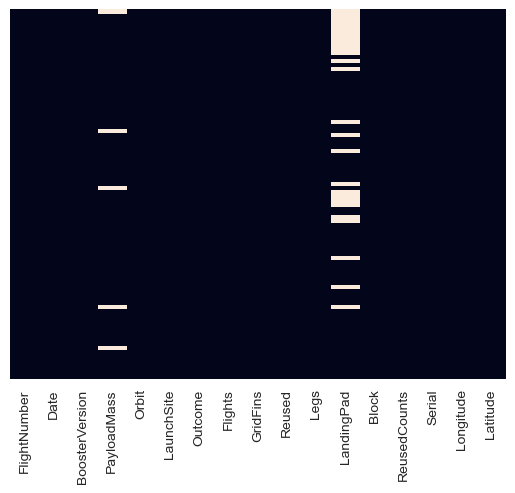

In [29]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

In [30]:
#finding the mean of payloadmass and replace nan values with that
PayloadMass_Mean = dataset['PayloadMass'].mean()
dataset['PayloadMass'] = dataset['PayloadMass'].replace(np.nan,PayloadMass_Mean)

In [31]:
dataset.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCounts       0
Serial             0
Longitude          0
Latitude           0
dtype: int64

In [32]:
#extract a .csv file of our dataset
dataset.to_csv('Dataset_part1.csv',index=False)